# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three contingency tables using only people whose age is between 30 and 40.

In [4]:
da.DMDMARTL = da.DMDMARTL.replace({1: 'Married', 2: 'Widowed', 3: 'Divorced',
                                  4: 'Separated', 5: 'Never married', 6: 'Living with partnet',
                                 77: 'Rest', 99: 'Rest'})

In [7]:
da.DMDMARTL.unique()

array(['Married', 'Divorced', 'Living with partnet', 'Separated',
       'Never married', nan, 'Widowed', 'Rest'], dtype=object)

In [11]:
da.RIAGENDR = da.RIAGENDR.replace({
    1: 'Male',
    2: 'Female'
})

In [12]:
da.RIAGENDR.unique()

array(['Male', 'Female'], dtype=object)

In [16]:
# Frequency table for women only
da.loc[da.RIAGENDR == 'Female', 'DMDMARTL'].value_counts(normalize=True)

Married                0.457193
Never married          0.182456
Divorced               0.122807
Widowed                0.103860
Living with partnet    0.091930
Separated              0.041404
Rest                   0.000351
Name: DMDMARTL, dtype: float64

In [18]:
# Frequency table for men only
da.loc[da.RIAGENDR == 'Male', 'DMDMARTL'].value_counts(normalize=True)

Married                0.562881
Never married          0.184451
Living with partnet    0.100991
Divorced               0.087271
Widowed                0.038110
Separated              0.025915
Rest                   0.000381
Name: DMDMARTL, dtype: float64

In [40]:
# Frequency table for men only beetween 30 and 40 years
da.loc[(da.RIAGENDR == 'Male') & (da.RIDAGEYR>30) & (da.RIDAGEYR<=40), 'DMDMARTL'].value_counts(normalize=True)

Married                0.563319
Never married          0.194323
Living with partnet    0.157205
Divorced               0.052402
Separated              0.026201
Widowed                0.004367
Rest                   0.002183
Name: DMDMARTL, dtype: float64

In [19]:
# Build a cetegorical feature with age
da["agecut"] = pd.cut(da.RIDAGEYR, [0, 18, 30, 40, 50, 60, 70, 80])
da["agecut"].head()

0    (60, 70]
1    (50, 60]
2    (70, 80]
3    (50, 60]
4    (40, 50]
Name: agecut, dtype: category
Categories (7, interval[int64]): [(0, 18] < (18, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

In [17]:
# Frequency table of all peolple
da.DMDMARTL.value_counts(normalize=True)

Married                0.507855
Never married          0.183412
Divorced               0.105773
Living with partnet    0.096273
Widowed                0.072342
Separated              0.033979
Rest                   0.000365
Name: DMDMARTL, dtype: float64

In [36]:
# Frequency table of all peolple beetween 30 and 40 years
da[(da.RIDAGEYR>30) & (da.RIDAGEYR<=40)].DMDMARTL.value_counts(normalize=True)

Married                0.553648
Never married          0.199571
Living with partnet    0.138412
Divorced               0.071888
Separated              0.031116
Widowed                0.004292
Rest                   0.001073
Name: DMDMARTL, dtype: float64

In [38]:
# Frequency table for women only beetween 30 and 40 years
da.loc[(da.RIAGENDR == 'Female') & (da.RIDAGEYR>30) & (da.RIDAGEYR<=40), 'DMDMARTL'].value_counts(normalize=True)

Married                0.544304
Never married          0.204641
Living with partnet    0.120253
Divorced               0.090717
Separated              0.035865
Widowed                0.004219
Name: DMDMARTL, dtype: float64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

Over all ages, there are more substantially Married Men than Women, the gender doesnt change much to people who
never married. Also, there are a lot more women separated then men.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

There are significantly more Married people or Living with partner beetwen 30-40 than the overall age sample, and
the overall age sample show signifcant more Divorced, Separated and Widowed people than the sample of 30-40 years people.

__Q1c.__ Repeat part b for the men.

For men only, there are a significantly more Living with partner to those at the at of 30-40 than the overall age.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [46]:
female_da = da[da['RIAGENDR'] == 'Female']
female_da.groupby(['RIAGENDR','agecut'])['DMDMARTL'].value_counts(normalize=True)

RIAGENDR  agecut    DMDMARTL           
Female    (18, 30]  Never married          0.468354
                    Married                0.285714
                    Living with partnet    0.206148
                    Divorced               0.019892
                    Separated              0.019892
          (30, 40]  Married                0.544304
                    Never married          0.204641
                    Living with partnet    0.120253
                    Divorced               0.090717
                    Separated              0.035865
                    Widowed                0.004219
          (40, 50]  Married                0.573705
                    Divorced               0.137450
                    Never married          0.125498
                    Living with partnet    0.073705
                    Separated              0.065737
                    Widowed                0.023904
          (50, 60]  Married                0.546809
                    Divo

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

To women, the **Marriege** status rise from the age of 18's to the 50's, and then starts falling off to the higher
ages.
The **Divorced** women vary a lot beetween ages, and the **Widowed** women tend to rise from the 50's on.

__Q2b.__ Repeat the construction for males.

In [62]:
male_da = da[da['RIAGENDR'] == 'Male']
male_da.groupby(['RIAGENDR','agecut'])['DMDMARTL'].value_counts(normalize=True)

RIAGENDR  agecut    DMDMARTL           
Male      (18, 30]  Never married          0.555085
                    Married                0.220339
                    Living with partnet    0.201271
                    Separated              0.014831
                    Divorced               0.004237
                    Widowed                0.004237
          (30, 40]  Married                0.563319
                    Never married          0.194323
                    Living with partnet    0.157205
                    Divorced               0.052402
                    Separated              0.026201
                    Widowed                0.004367
                    Rest                   0.002183
          (40, 50]  Married                0.703242
                    Never married          0.097257
                    Divorced               0.084788
                    Living with partnet    0.082294
                    Separated              0.027431
                    Wido

In [ ]:
# insert your code here

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights in the NHANES sample.

Text(0.5,1,'Heights Distribution Plot')

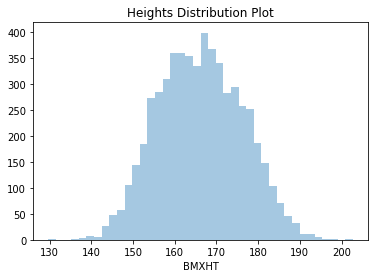

In [61]:
sns.distplot(da.BMXHT.dropna(), kde = False, bins=40).set_title('Heights Distribution Plot')

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

The lower the number of bins, the smoother the distplot becomes, but too low number of bins may hide the real shape of the curve.

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

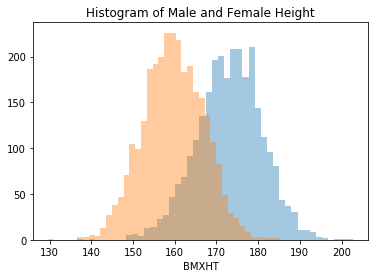

In [63]:
male_da = da[da['RIAGENDR'] == 'Male']
female_da = da[da['RIAGENDR'] == 'Female']
# Plot a histogram of both the total bill and the tips'
sns.distplot(male_da.BMXHT.dropna(), kde = False)
sns.distplot(female_da.BMXHT.dropna(), kde = False).set_title("Histogram of Male and Female Height")
plt.show()

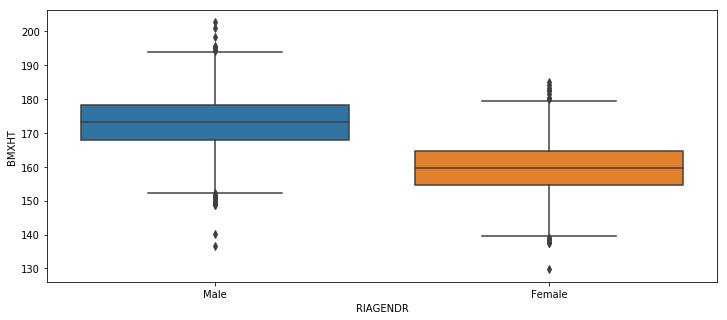

In [64]:
# BoxPlot of Height by Gender
plt.figure(figsize=(12, 5)) 
sns.boxplot(x="RIAGENDR", y="BMXHT", data=da) 

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

In the boxplot the center of ages by the median is easier to reach, since on the histogram it is harder. Also,
it is easier to see in boxplots that the outliers for Men are more sparse than for Women.

__Q3d.__ Make a histogram of the log-transformed heights.

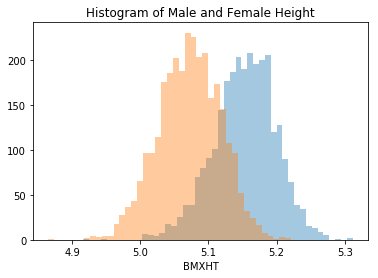

In [66]:
male_da = da[da['RIAGENDR'] == 'Male']
female_da = da[da['RIAGENDR'] == 'Female']
# Plot a histogram of both the total bill and the tips'
sns.distplot(np.log(male_da.BMXHT.dropna()), kde = False)
sns.distplot(np.log(female_da.BMXHT.dropna()), kde = False).set_title("Histogram of Male and Female Height")
plt.show()

__Q3e.__ Comment on the relationship between the ditribution of the heights and the distribution of the log-transformed heights. 

I dont see a huge difference beetwen log and non-log transformed variables distribution.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

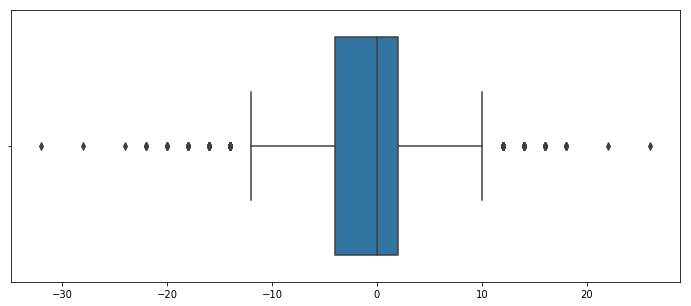

In [68]:
plt.figure(figsize=(12, 5)) 
sns.boxplot(da.BPXSY2 - da.BPXSY1) 

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [83]:
da['BPXSYdif'] = da.BPXSY2 - da.BPXSY1
da[da.BPXSYdif>0].BPXSYdif.count()/len(da[da.notnull()])

0.34123801220575412

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

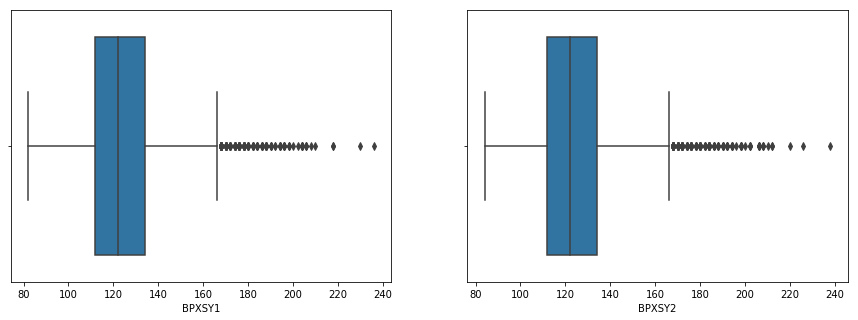

In [88]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(da.BPXSY1,  ax=axes[0])
sns.boxplot(da.BPXSY2,  ax=axes[1]) 

In [89]:
da.BPXSY1.describe()

count    5401.000000
mean      125.084614
std        18.480873
min        82.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       236.000000
Name: BPXSY1, dtype: float64

In [90]:
da.BPXSY2.describe()

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

Both measurements are honestly very close, in regard to all of the 5 metrics described by the boxplot, except the meand of the second measurements is slightly lower.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [ ]:
# insert your code here

__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [7]:
# insert your code here

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [1]:
# insert your code here

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [ ]:
# insert your code here

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.